# Fill Missing Values using KNN

# Importing the Libraries and Loading the Dataset

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('dataset.csv') 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Μετατροπή των Categorical Features σε Numerical Value

In [52]:
df4=df.copy(deep=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_type_columns = df4.select_dtypes(include='object')
    
for title in object_type_columns:
     df4[title] = le.fit_transform(df4[title])

In [53]:
"""from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df4[['age','work_type','avg_glucose_level','bmi','smoking_status']]=min_max_scaler.fit_transform(df4[['age','work_type','avg_glucose_level','bmi','smoking_status']])
df4.tail()"""

"from sklearn.preprocessing import MinMaxScaler\nmin_max_scaler = MinMaxScaler()\ndf4[['age','work_type','avg_glucose_level','bmi','smoking_status']]=min_max_scaler.fit_transform(df4[['age','work_type','avg_glucose_level','bmi','smoking_status']])\ndf4.tail()"

# Συμπλήρωση των τιμών χρησιμοποιώντας k-Nearest Neighbors 

In [54]:
train = df4[df4['bmi'].isna()==False] 
pred = df4[df4['bmi'].isna()] # Null values

In [55]:
bmi_regressor = KNeighborsRegressor(n_neighbors=5)
X = train.drop(['bmi'], axis=1)
y = train['bmi']
bmi_regressor.fit(X, y)
y_BMI = bmi_regressor.predict(pred.drop(['bmi'], axis=1))
pred.loc[:, 'bmi'] = y_BMI

df4 = pd.concat([train, pred])
print("Missing Values per Column:")
df4.isnull().sum()

Missing Values per Column:


c:\users\charalampos\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Random Forest Classification

In [56]:
RF_clf = RandomForestClassifier()
new_data = df4.copy(deep=True) #Δημιουργώ deep copy ώστε να μην κάνω αλλαγές στο αρχικό dataset.

X = new_data.drop(['id','stroke'], axis=1)
y = new_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Χωρίζω το Dataset σε train kai test set με αναλογία 75-25 .

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1205
           1       1.00      0.01      0.03        73

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.94      0.92      1278



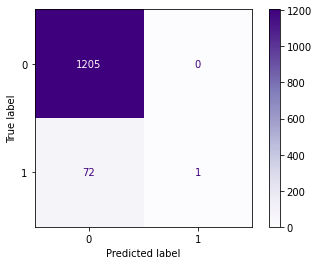

In [57]:
RF_clf.fit(X_train, y_train) 
RF_prediction = RF_clf.predict(X_test)
RF_prob = RF_clf.predict_proba(X_test)[:, 1]
RF_metrics = metrics.f1_score(y_test, RF_prediction).round(2)
RF_report = metrics.classification_report(y_test, RF_prediction)
metrics.plot_confusion_matrix(RF_clf, X_test, y_test, cmap='Purples')
plt.grid(False)
print(RF_report)

# Oversampling

Βλέπουμε ότι το μοντέλο μας δεν ταξινομεί καλά τους 'άσσους' και μας δίνει καλά αποτελέσματα μόνο για τα 'μηδενικά'. Παρατηρώντας την ανάλυση του dataset θα δούμε ότι οι περιπτώσεις που έχουμε 'άσσο', δηλαδή τις περιπτώσεις που έχουμε εγκεφαλικό επεισόδιο είναι πολύ λίγες σε σχέση με τα 'μηδενικά'. Αυτό λύνεται χρησιμοποιώντας την μέθοδο του oversampling ώστε να τα φέρουμε σε μια ισορροπία.

In [58]:
sm = SMOTE(random_state=2) #Balance data by oversampling
x_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Πρίν το oversampling, πλήθος '1': {}".format(sum(y_train==1)))
print("Πρίν το OveraSampling, πλήθος '0': {} \n".format(sum(y_train==0)))
print("Μετά το OverSampling, πλήθος '1': {}".format(sum(y_train_res==1)))
print("Μετά το OverSampling, πλήθος '0': {}".format(sum(y_train_res==0)))

Πρίν το oversampling, πλήθος '1': 176
Πρίν το OveraSampling, πλήθος '0': 3656 

Μετά το OverSampling, πλήθος '1': 3656
Μετά το OverSampling, πλήθος '0': 3656


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1205
           1       0.19      0.23      0.21        73

    accuracy                           0.90      1278
   macro avg       0.57      0.59      0.58      1278
weighted avg       0.91      0.90      0.90      1278



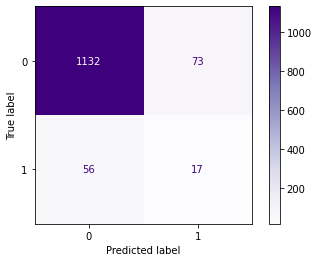

In [59]:
RF_clf.fit(x_train_res, y_train_res) 
RF_prediction = RF_clf.predict(X_test)
RF_prob = RF_clf.predict_proba(X_test)[:, 1]
RF_metrics = metrics.f1_score(y_test, RF_prediction).round(2)
RF_report = metrics.classification_report(y_test, RF_prediction)
metrics.plot_confusion_matrix(RF_clf, X_test, y_test, cmap='Purples')
plt.grid(False)
print(RF_report)